# Hate speech

Hate sonar!!!!!
readability test (additional features)

## 1. Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from hatesonar import Sonar

## 2. Reading data

In [2]:
df = pd.read_parquet('cleaned_data/df_combined.parquet')

In [3]:
df.head()

,in_reply_to_user_id,reply_settings,author_id,context_annotations,id,text,edit_controls,referenced_tweets,created_at,edit_history_tweet_ids,...,links,hashtags,retweet_count,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,name
0,375146901.0,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846277256509116672,"@donaldtusk Niezrealizowanie większości ze ""10...",{'editable_until': '2024-10-15 20:49:34+00:00'...,"[{'id': '1846091776269963695', 'type': 'replie...",2024-10-15 19:49:34+00:00,[1846277256509116623],...,[],[],3,1,33,0,1555,"Failure to implement most of the ""100 specifi...","Failure to implement most of the ""100 specifi...",Bartłomiej Pejo
1,NaN,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846222583898784000,Rok po wyborach trzeba powiedzieć jedno - nie ...,{'editable_until': '2024-10-15 17:12:19+00:00'...,None,2024-10-15 16:12:19+00:00,[1846222583898784025],...,[https://t.co/4Jh5Ni6sgr],[],9,2,72,0,3031,"A year after the elections, one thing must be ...","A year after the elections, one thing must be ...",Bartłomiej Pejo
2,NaN,everyone,1.182212e+09,None,1846161400328028160,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",{'editable_until': '2024-10-15 13:09:12+00:00'...,None,2024-10-15 12:09:12+00:00,[1846161400328028272],...,"[https://t.co/zFk5QLd1em, https://t.co/bRV4y07...",[],4,3,33,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,Bartłomiej Pejo
3,NaN,everyone,1.182212e+09,None,1846091824101769472,Mija rok od wyborów parlamentarnych. W kampani...,{'editable_until': '2024-10-15 08:32:44+00:00'...,None,2024-10-15 07:32:44+00:00,[1846091824101769490],...,"[https://t.co/rtVu3Bh43G, https://t.co/8Q3LME6...",[],6,2,38,0,2441,A year has passed since the parliamentary elec...,A year has passed since the parliamentary elec...,Bartłomiej Pejo
4,NaN,everyone,1.182212e+09,None,1846075343188144128,#Idę11 🇵 🇱 https://t.co/KiCe5ATOpX,{'editable_until': '2024-10-15 07:27:14+00:00'...,None,2024-10-15 06:27:14+00:00,[1846075343188144153],...,[https://t.co/KiCe5ATOpX],[#Idę11],45,18,616,2,8634,#I'm going11 🇵 🇱,#I'm going11 🇵 🇱,Bartłomiej Pejo


In [8]:
df = df[['username','party','mentions']].copy()

In [10]:
df['mentions'] = df['mentions'].apply(lambda x: [mention[1:] if mention.startswith('@') else mention for mention in x])

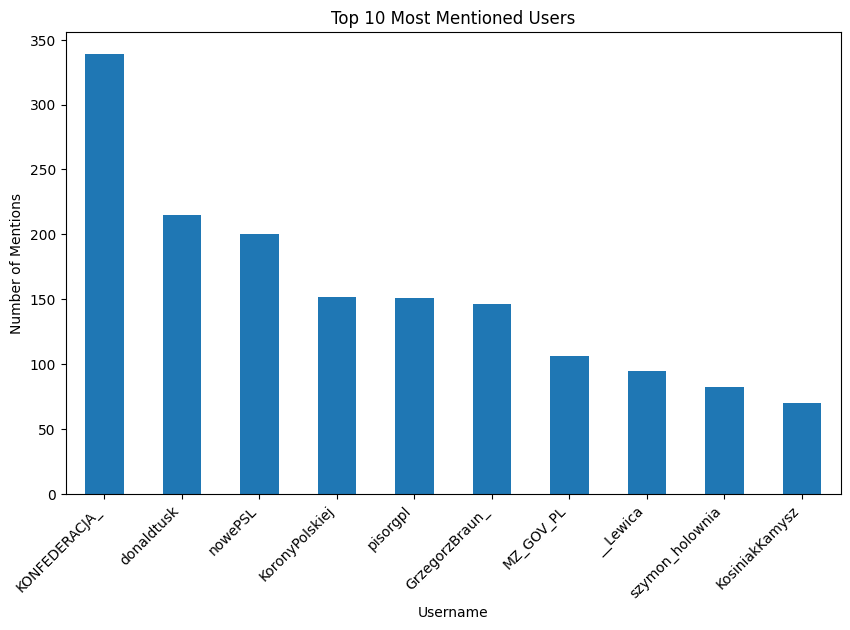

In [16]:
# Explode the mentions column to have one mention per row
mentions_exploded = df.explode('mentions')

# Count the occurrences of each mention
mention_counts = mentions_exploded['mentions'].value_counts().head(10)

# Plot the top 10 most mentioned users
mention_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Mentioned Users')
plt.xlabel('Username')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for _, row in mentions_exploded.dropna(subset=['mentions']).iterrows():
    G.add_edge(row['username'], row['mentions'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowsize=10)
plt.title('Connections Between Users and Mentioned Users')
plt.show()